## Group Project Proposal

## Heart Disease

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal**
- Heart disease is a variety of conditions that effect the heart, while angina specifically is a type of discomfort or chest pain that results when one’s heart muscles don’t get enough oxygen from their blood. 

**Clearly state the question you will try to answer with your project**
- Is there a target audience for each chest pain type? 

**Identify and describe the dataset that will be used to answer the question**
- The dataset contains patient chart data provided by physicians from 4 different cardiovascular clinics in Hungary, Switzerland and the United States. Processed data donated on July 1st, 1998 contains 14 different variables concerning patient information and factors that affect heart disease. 

## Preliminary exploratory data analysis

**Loading R libraries**

In [1]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading the data into R**

In [2]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) 
       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")
cleveland_data <- cleveland_data |>
mutate(cp = as_factor(cp))

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering the na and all the missing values** 

We can see that only ca and thal columns has the header of chr and every other columns are dbl. It tells us that only ca and thal has the missing value since we know that the missing value is represent by '?' in this dataset. We can then filter the '?' out of these two columns, and use the drop_na() to make sure we drop all the na values.

In [3]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()


filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


For our convenience, we can then mutate the columns that is a factor, by assigning the actual meaning of the number.

In [4]:
# conven_data <- filtered_data |>
# mutate(sex = ifelse(sex == 1, "male", "female")) |>
# mutate(sex = as_factor(sex)) 


# This is how you mutate a number to a string

Then we can split the data into training and testing data

In [5]:
chest_pain_split <- initial_split(filtered_data, prop = 0.75, strata = cp)  
chest_pain_train <- training(chest_pain_split)   
chest_pain_test <- testing(chest_pain_split)

chest_pain_train
chest_pain_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
60,1,4,130,206,0,2,132,1,2.4,2,2.0,7.0,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0,2
41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


**Change the column type**

Once we clear the missing values we can mutate the ca and thal columns from chr to numeric.

In [6]:
type_train_data <- chest_pain_train |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

type_test_data <- chest_pain_test |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))
type_train_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2,6,3
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2


**Summaize data**

In [7]:
count_sex <- chest_pain_train|>
    group_by(sex)|>
    summarize(n = n())

count_fbs <- chest_pain_train|>
    group_by(fbs)|>
    summarize(n = n())

count_restecg <- chest_pain_train|>
    group_by(restecg)|>
    summarize(n = n())

count_exang <- chest_pain_train|>
    group_by(exang)|>
    summarize(n = n())

count_slope <- chest_pain_train|>
    group_by(slope)|>
    summarize(n = n())

count_ca <- chest_pain_train|>
    group_by(ca)|>
    summarize(n = n())

count_thal <- chest_pain_train|>
    group_by(thal)|>
    summarize(n = n())

count_num <- chest_pain_train|>
    group_by(num)|>
    summarize(n = n())

count_sex
count_fbs
count_restecg
count_exang
count_slope
count_ca
count_thal
count_num

sex,n
<dbl>,<int>
0,76
1,146


fbs,n
<dbl>,<int>
0,184
1,38


restecg,n
<dbl>,<int>
0,109
1,3
2,110


exang,n
<dbl>,<int>
0,150
1,72


slope,n
<dbl>,<int>
1,107
2,97
3,18


ca,n
<chr>,<int>
0.0,133
1.0,43
2.0,32
3.0,14


thal,n
<chr>,<int>
3.0,125
6.0,12
7.0,85


num,n
<dbl>,<int>
0,120
1,39
2,28
3,28
4,7


In [8]:
mean_data <- chest_pain_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55.06306,131.7973,251.5856,149.545,1.075225


**Discover the distribution of chest pain type**

In [9]:
counting_types <- type_train_data |>
    group_by(cp)|>
    summarize(types_count = n()) 
counting_types

cp,types_count
<fct>,<int>
1,20
2,36
3,61
4,105


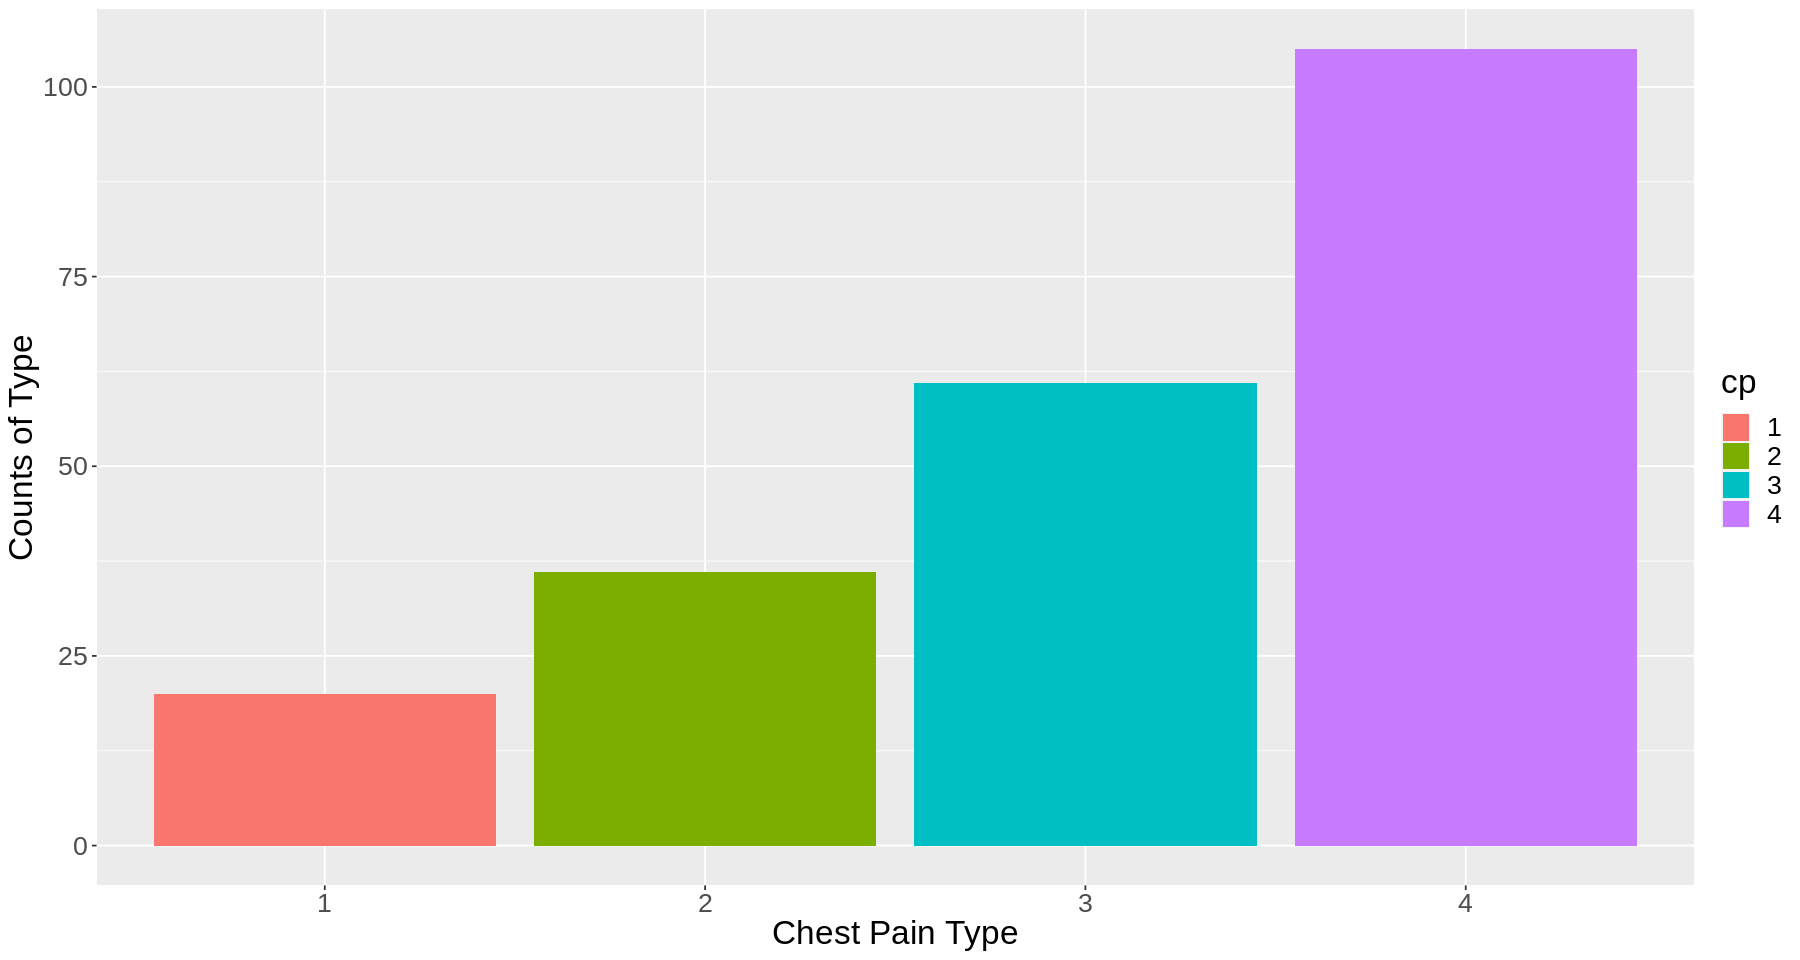

In [18]:
type_vs_cp <- counting_types |>
    ggplot(aes(x = cp, y = types_count, fill = cp)) +
    geom_bar(stat = "identity") +
    labs(x = "Chest Pain Type",y = "Counts of Type", color = "Chest Pain Type") +
    theme(text = element_text(size = 20))
type_vs_cp

We can see from the graph that the four different types are not evenly distributed in the data set. What we can do in the future is to use `library(themis)` to  use the `up_sampling()` function in the recipe to balance the distribution of different types.

**Visualizing data**

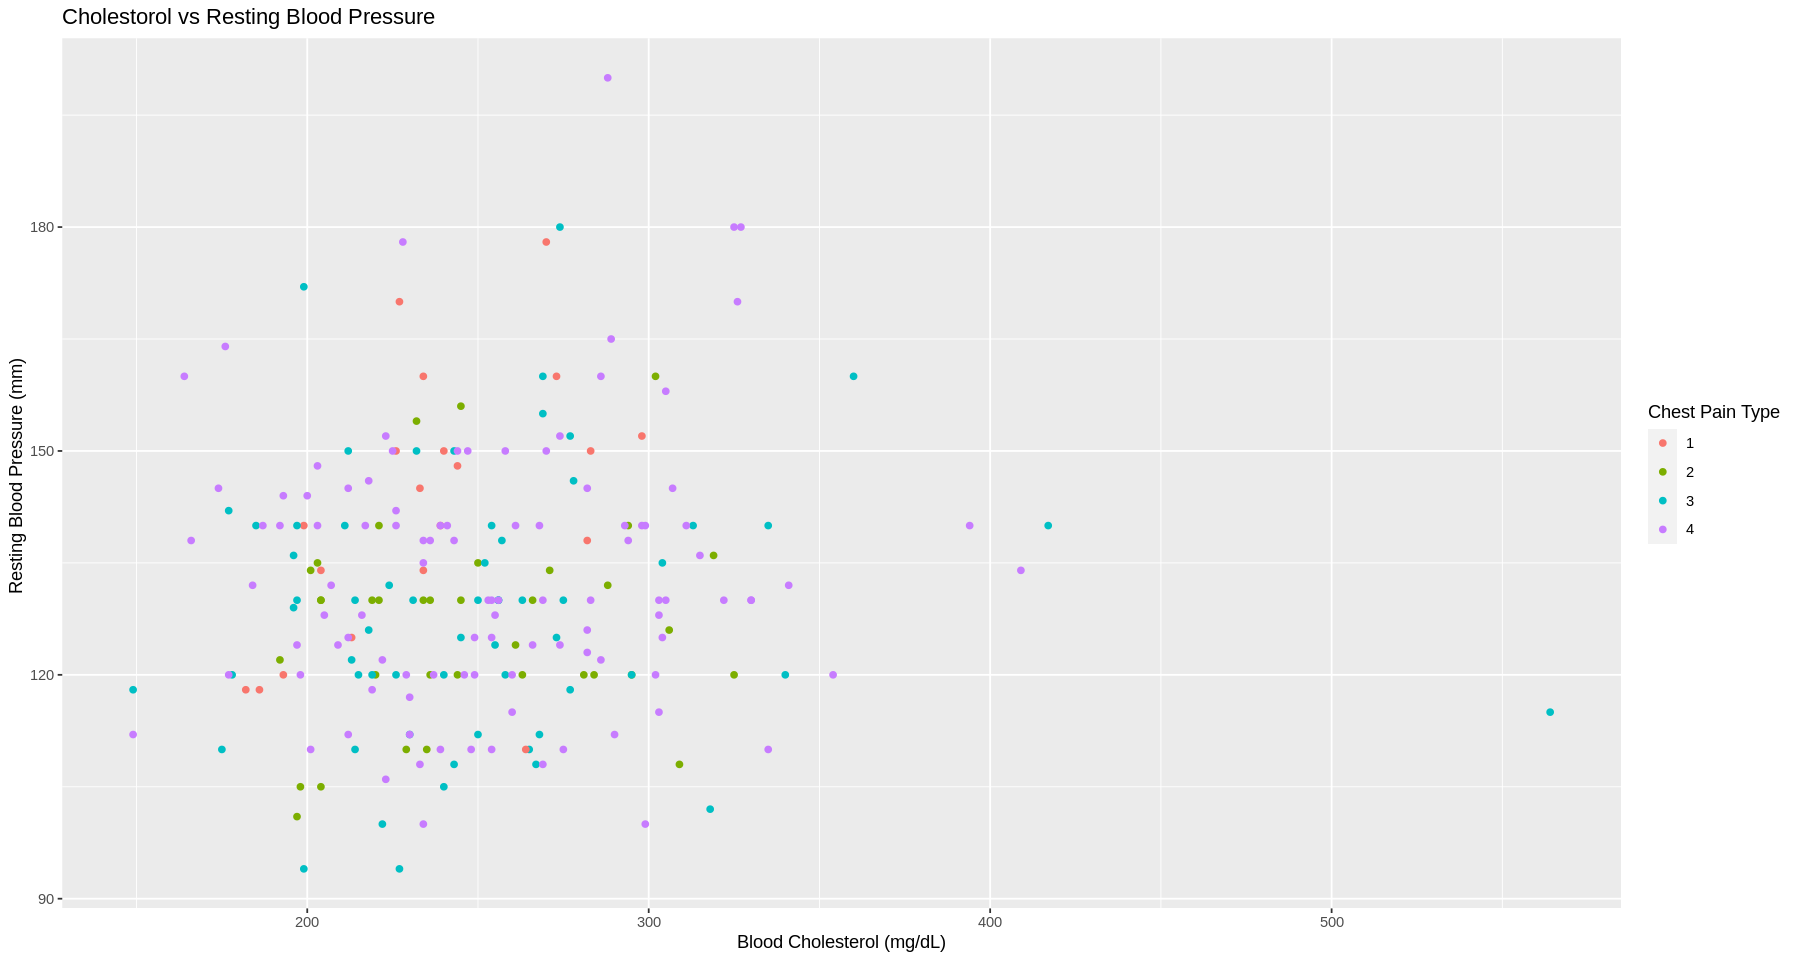

In [17]:
options(repr.plot.width = 15, repr.plot.height = 8) 

trestbps_vs_chol <- type_train_data |>
ggplot(aes(x = chol , y = trestbps, color = cp))+
geom_point()+
labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm) ", color = "Chest Pain Type") +
ggtitle("Cholestorol vs Resting Blood Pressure")
trestbps_vs_chol

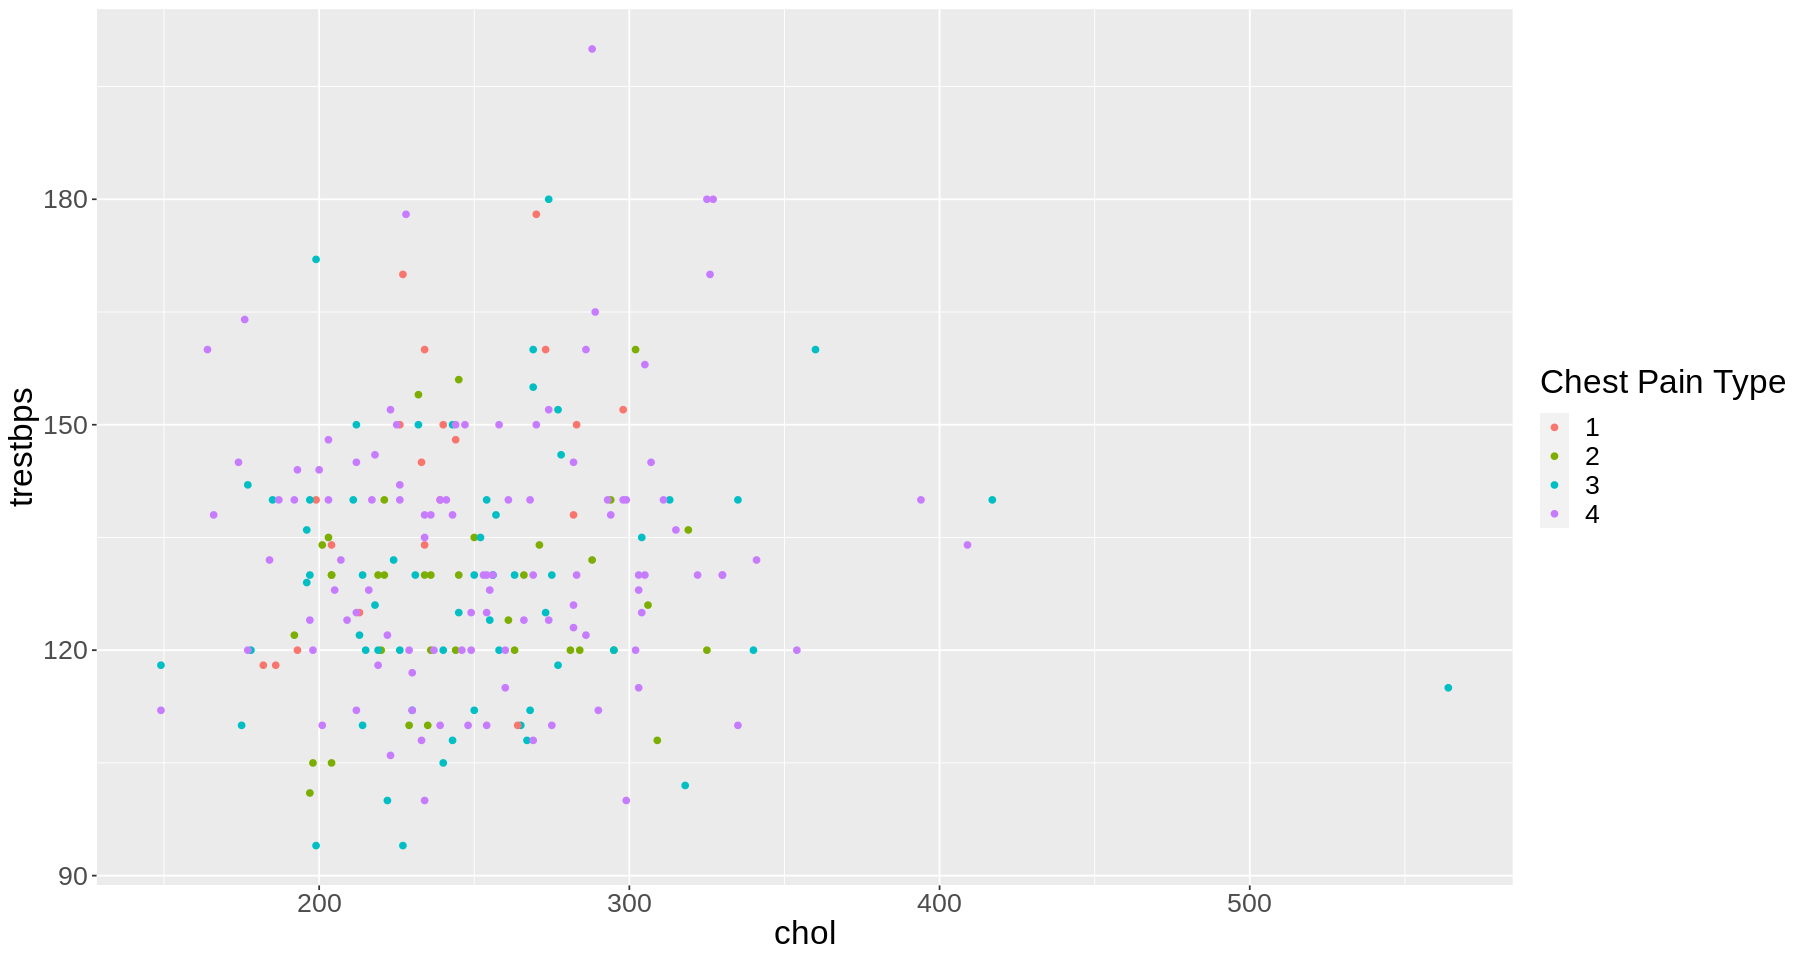

In [12]:
trestbps_vs_chol <- type_train_data |>
    ggplot(aes(x = chol , y = trestbps, color = cp)) +
    geom_point() +
    labs(x = "chol", y = "trestbps", color = "Chest Pain Type") +
    theme(text = element_text(size = 20))
trestbps_vs_chol

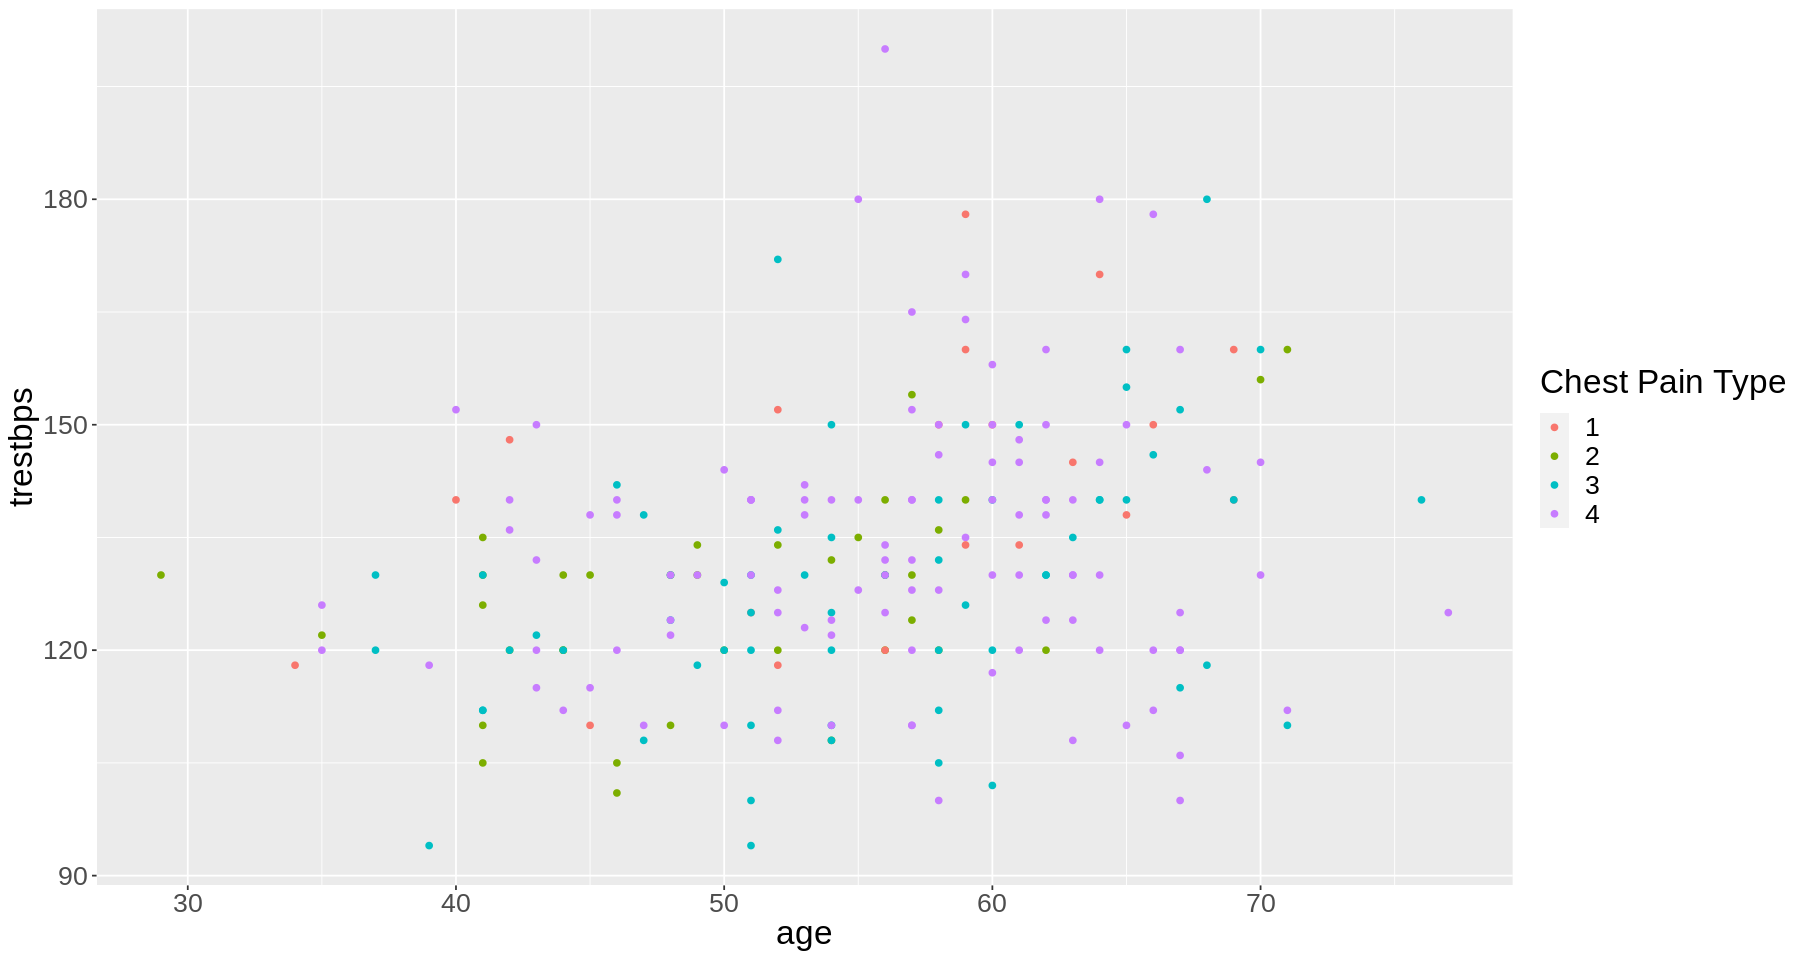

In [13]:
trestbps_vs_age <- type_train_data |>
    ggplot(aes(x = age , y = trestbps, color = cp)) +
    geom_point() +
    labs(x = "age", y = "trestbps", color = "Chest Pain Type") +
    theme(text = element_text(size = 20))
trestbps_vs_age

Here, we visualize the distribution of chest pain types of males vs females.

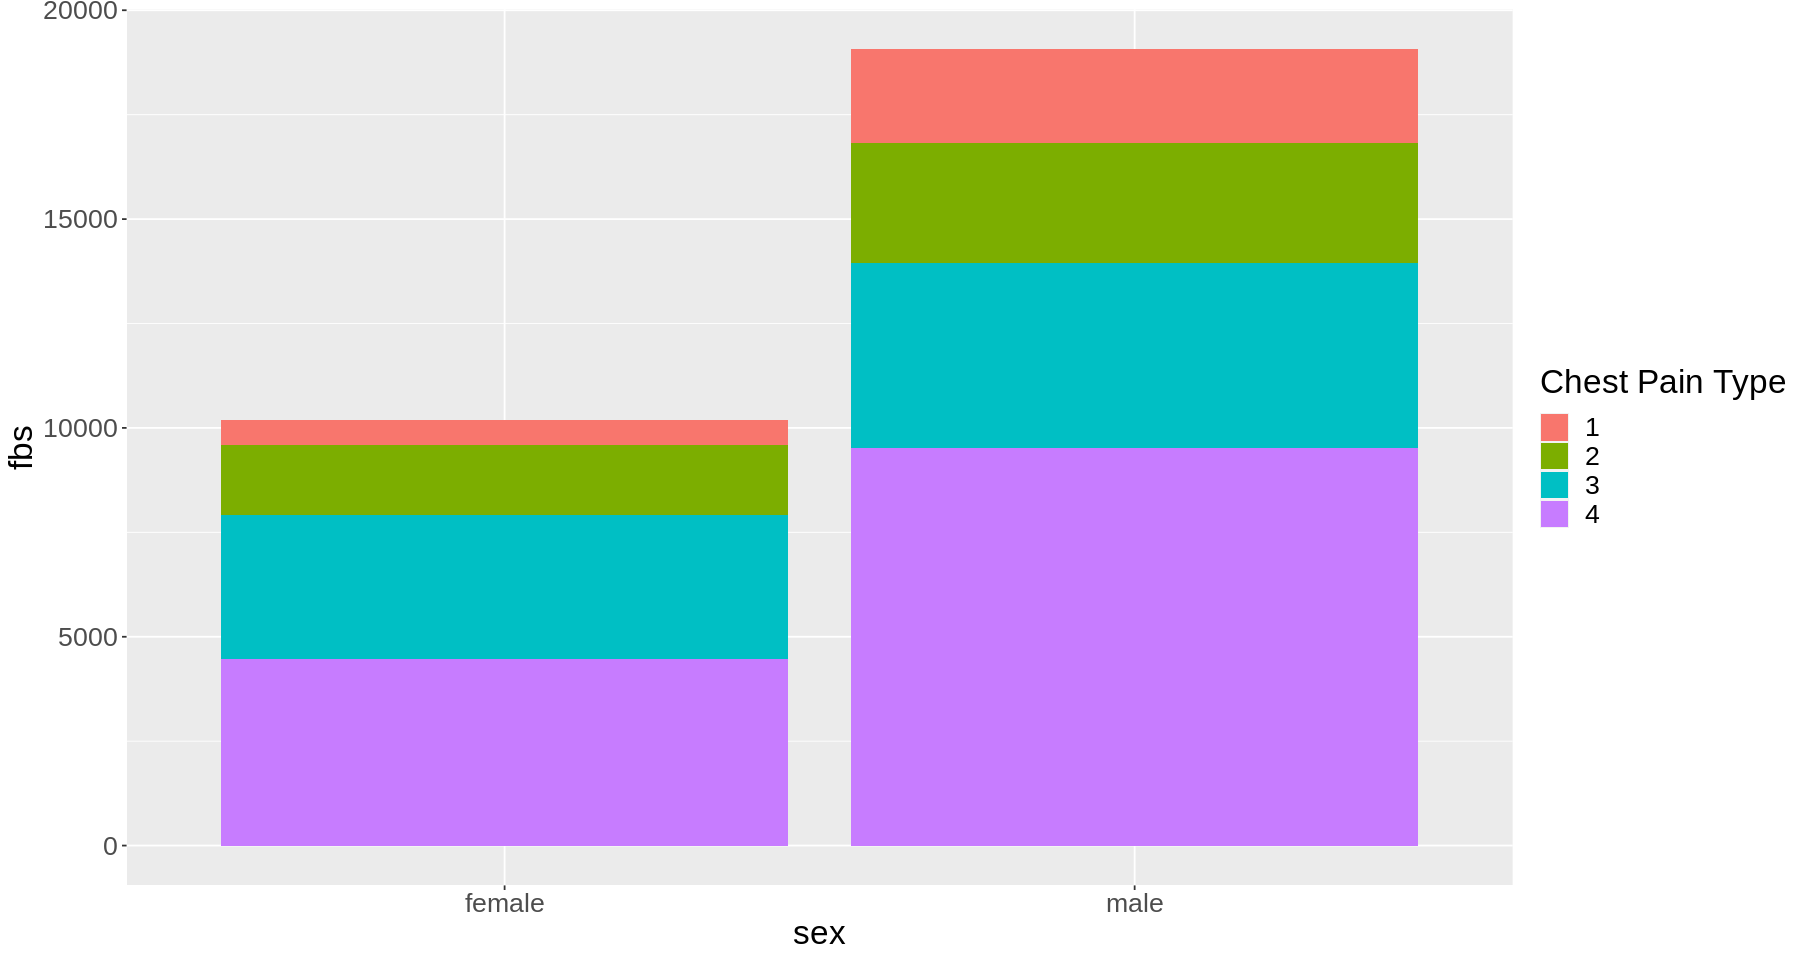

In [14]:
sex_vs_fbs  <- type_train_data |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = trestbps, fill = cp)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "fbs", fill = "Chest Pain Type") +
    theme(text = element_text(size = 20))
sex_vs_fbs

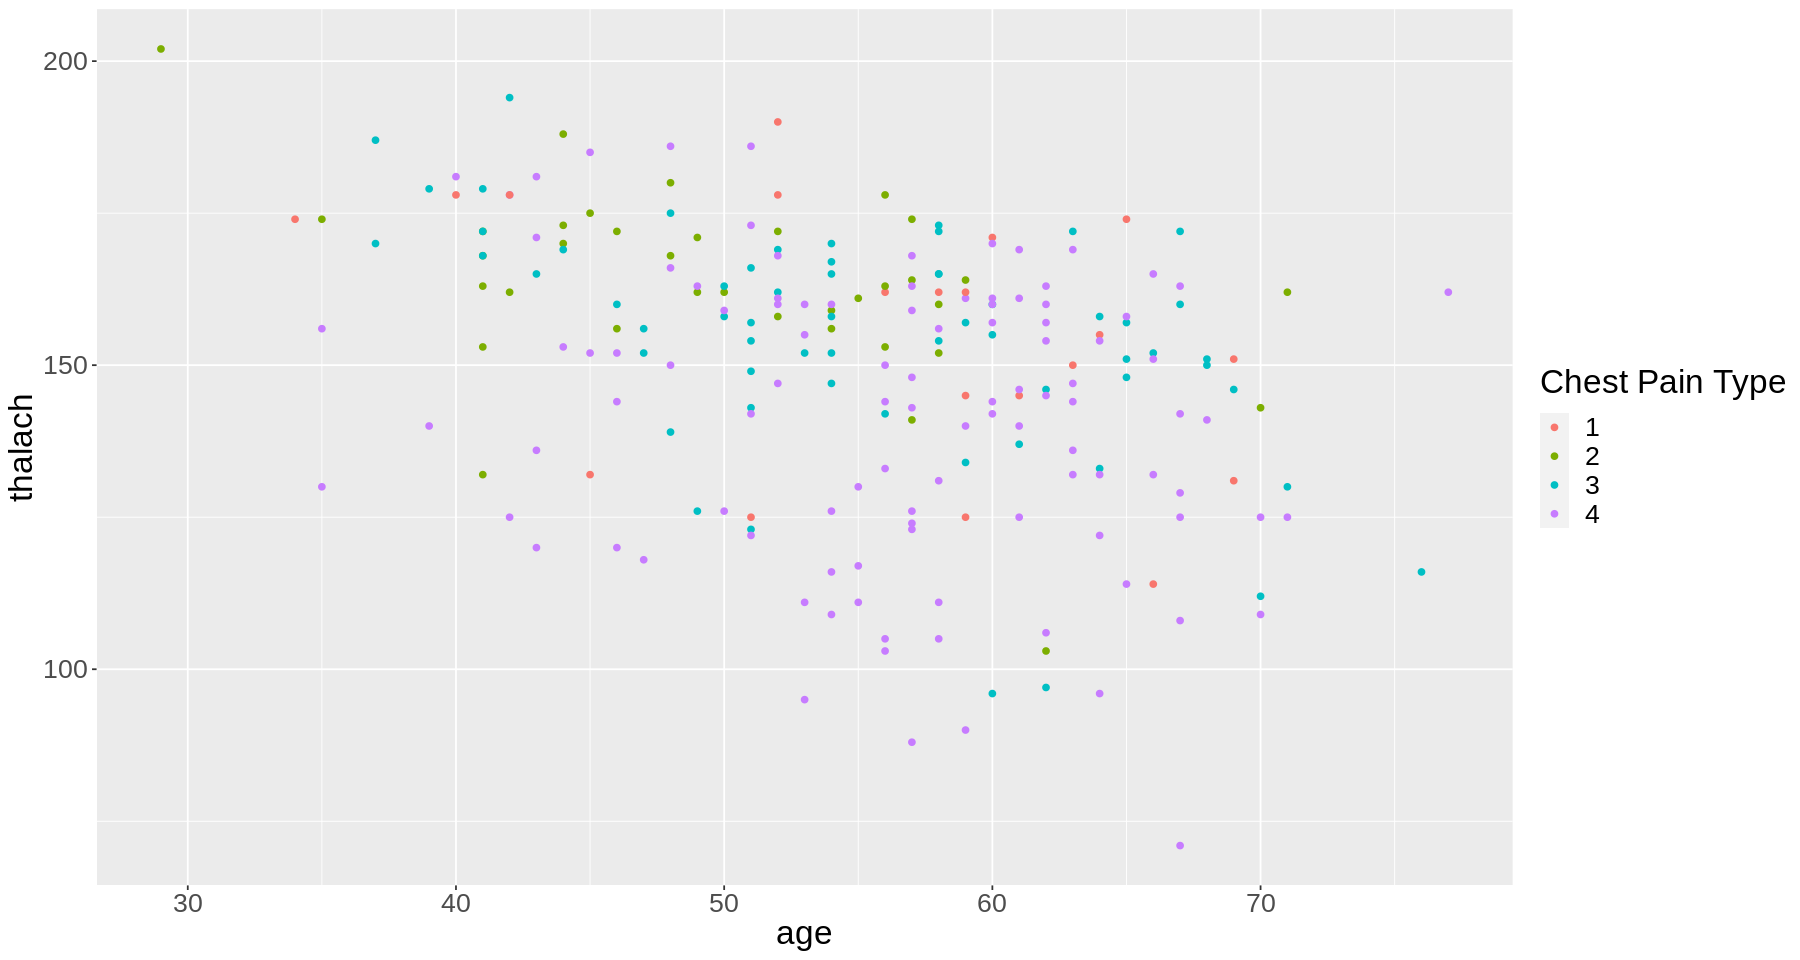

In [15]:
age_vs_thalach <- type_train_data |>
    ggplot(aes(x = age , y = thalach, color = cp))+
    geom_point()+
    labs(x = "age", y = "thalach", color = "Chest Pain Type") +
    theme(text = element_text(size = 20))
age_vs_thalach

**Overlaying distribution of the predictor variable**

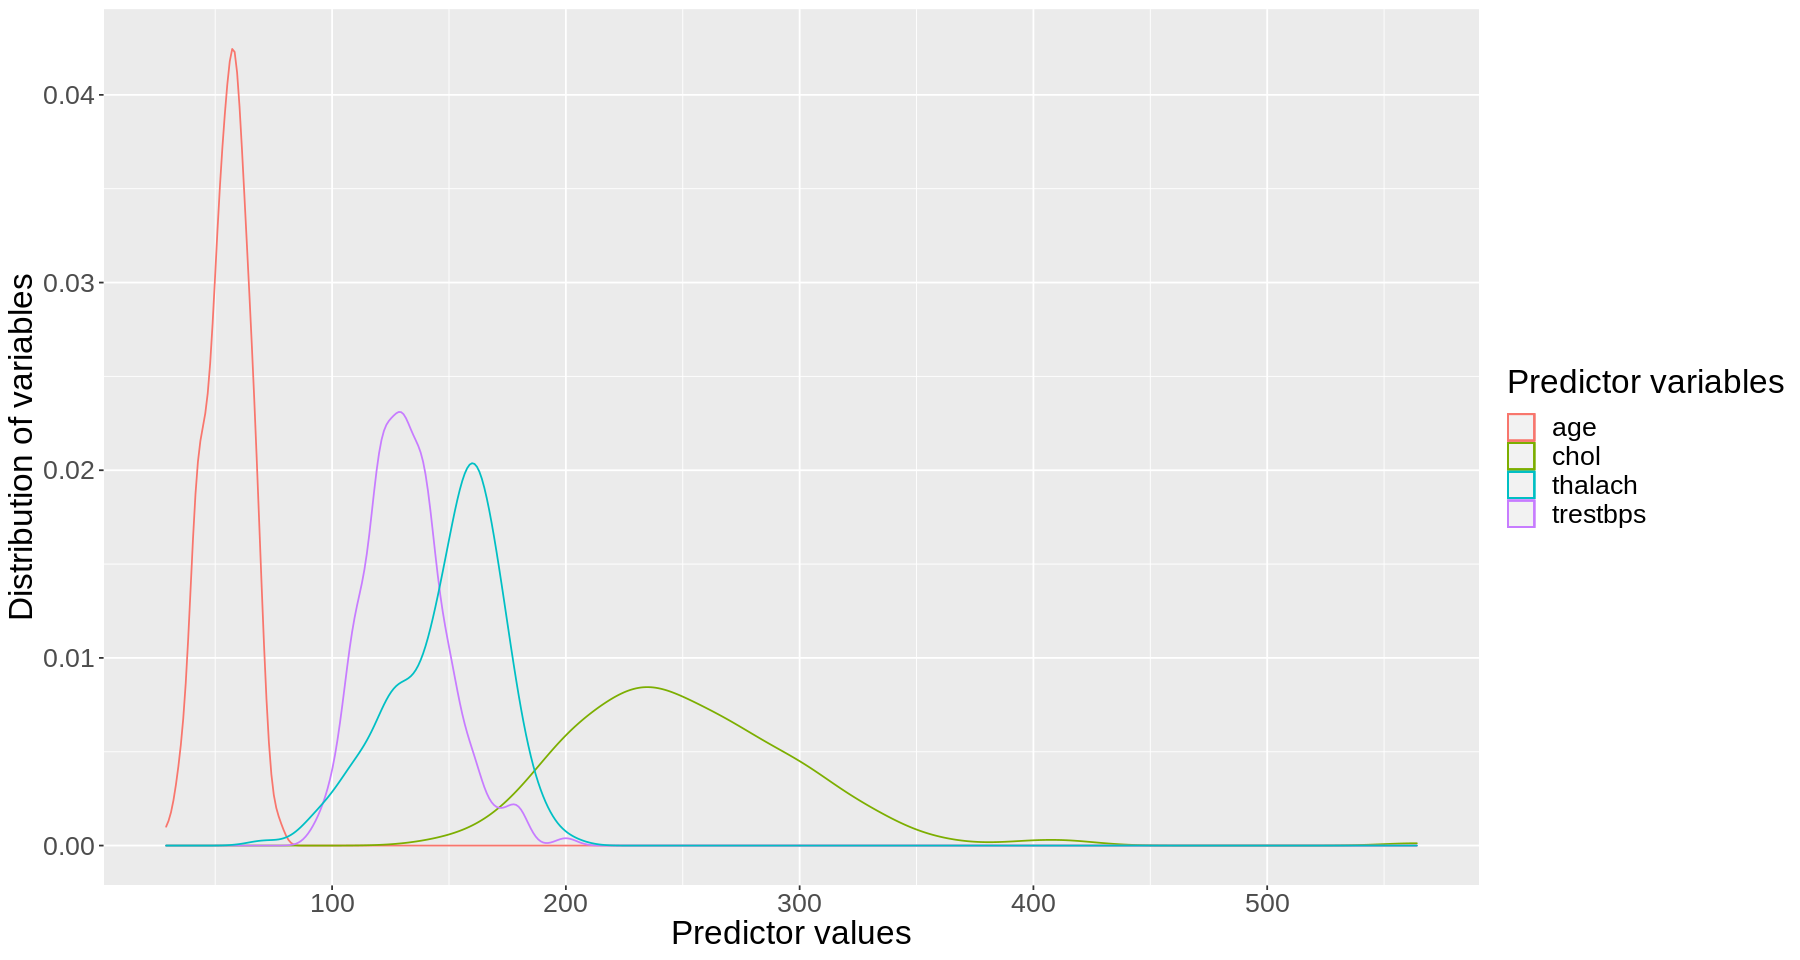

In [16]:
ggplot(type_train_data) + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    theme(text = element_text(size = 20))

## Methods

## Expected outcomes and significance